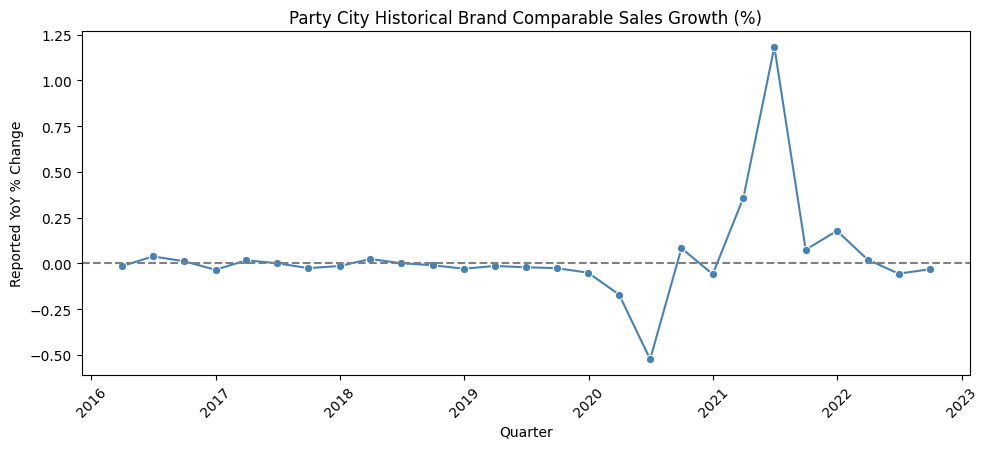

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load reported numbers
reported = pd.read_excel("system2_case_study_reported_numbers.xlsx")

# Clean percentages
reported["reported_yoy"] = pd.to_numeric(
    reported["reported_yoy"].astype(str).str.replace("%", ""), errors="coerce"
)
reported["period_end_dt"] = pd.to_datetime(reported["period_end_dt"])

# Filter for PRTY and sort
reported = reported.sort_values("period_end_dt")

# Line plot
plt.figure(figsize=(10,5))
sns.lineplot(
    data=reported, 
    x="period_end_dt", 
    y="reported_yoy", 
    marker="o", 
    color="steelblue"
)
plt.axhline(0, color="gray", linestyle="--")
plt.title("Party City Historical Brand Comparable Sales Growth (%)")
plt.xlabel("Quarter")
plt.ylabel("Reported YoY % Change")
plt.xticks(rotation=45)
# After plotting the combined subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save as high-res PNG for slides
plt.savefig("partycity_historical_brand_comparable_sales_growth.png", dpi=300, bbox_inches='tight')

# Then display
plt.show()


/var/folders/zs/5f511r4n06z0wpsxfpxw7vsw0000gn/T/ipykernel_15571/3430117972.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


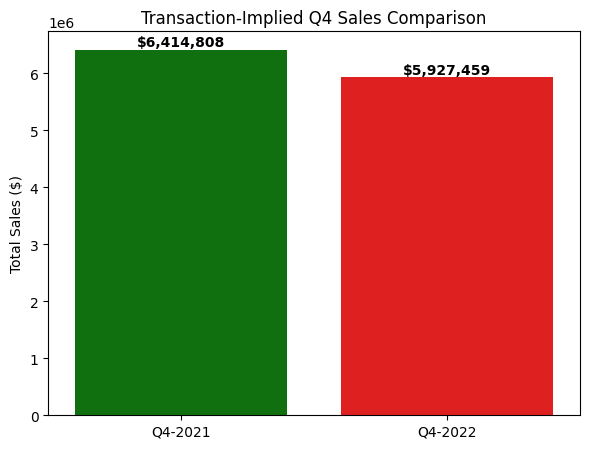

In [7]:
# Load transaction data (monthly sales by location)
sales_q4 = pd.read_csv("system2_case_study_transaction_data_monthly_sales_by_locationid.csv")

# Filter Q4 2021 and 2022
sales_q4["period_end"] = pd.to_datetime(sales_q4["period_end"])
sales_2021 = sales_q4[(sales_q4["period_end"].dt.year == 2021) & (sales_q4["period_end"].dt.month >= 10)]
sales_2022 = sales_q4[(sales_q4["period_end"].dt.year == 2022) & (sales_q4["period_end"].dt.month >= 10)]

# Aggregate total sales by year
total_2021 = sales_2021["amount"].sum()
total_2022 = sales_2022["amount"].sum()

# Bar chart
plt.figure(figsize=(6,5))
sns.barplot(
    x=["Q4-2021", "Q4-2022"],
    y=[total_2021, total_2022],
    palette=["green","red"]
)
plt.title("Transaction-Implied Q4 Sales Comparison")
plt.ylabel("Total Sales ($)")
for i, v in enumerate([total_2021, total_2022]):
    plt.text(i, v + v*0.01, f"${v:,.0f}", ha="center", fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save as high-res PNG for slides
plt.savefig("partycity_transaction_sales_comparison.png", dpi=300, bbox_inches='tight')

# Then display
plt.show()

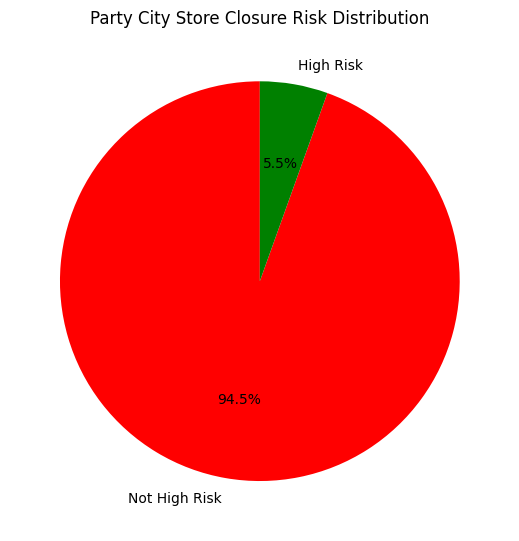

In [8]:
# Load web locations
web_locations = pd.read_csv("system2_case_study_webscrape_data_locations.csv")

# Number of services offered per store
web_locations["num_services"] = (
    web_locations["store_services"]
    .fillna("")
    .str.count("\|") + 1
)

# Flag urban vs suburban (rough heuristic via ZIP length)
web_locations["suburban_flag"] = (
    web_locations["zipcode"].astype(str).str.len() == 5
)

# Example risk score creation (if not already done)
web_locations["closure_risk_score"] = (
    (web_locations["num_services"] <= 3).astype(int) +
    web_locations["suburban_flag"].astype(int)
)

# High-risk flag
web_locations["high_risk_flag"] = web_locations["closure_risk_score"] == 2

# Count
risk_counts = web_locations["high_risk_flag"].value_counts().rename(
    index={True: "High Risk", False: "Not High Risk"}
)

# Pie chart
plt.figure(figsize=(6,6))
colors = ["red", "green"]
plt.pie(risk_counts, labels=risk_counts.index, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Party City Store Closure Risk Distribution")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save as high-res PNG for slides
plt.savefig("partycity_store_closure_risk.png", dpi=300, bbox_inches='tight')

# Then display
plt.show()
